# Statistical Thinking

## Introduction

The dataset used in this analysis, involves the Millennium Development Goals which were a set of 8 goals defined in 2015 by United Nations. This was to help improve the living conditions and conditions of the planet. Key indicators for each goal were defined and used to determine if goals were met. In this project, we will look at key indicators for goal 7 to ensure environmental stability. These indicators are carbon dioxide emmisions, protected forests, land and sea areas.

### Importing and loading the datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt
from scipy.stats import pearsonr, spearmanr

In [2]:
statistical_df = pd.read_csv("..\data\MDG_Export_20191227.csv", sep=',', skipinitialspace=True)
statistical_df.head()

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,...,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.10,NaN,E,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.90,NaN,G,2493.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,NaN,C,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.80,NaN,C,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488.00,NaN,G,3971.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
statistical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 95 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CountryCode   690 non-null    int64  
 1   Country       690 non-null    object 
 2   SeriesCode    690 non-null    int64  
 3   MDG           690 non-null    object 
 4   Series        690 non-null    object 
 5   1990          627 non-null    float64
 6   Footnotes     5 non-null      float64
 7   Type          628 non-null    object 
 8   1991          182 non-null    float64
 9   Footnotes.1   0 non-null      float64
 10  Type.1        182 non-null    object 
 11  1992          204 non-null    float64
 12  Footnotes.2   0 non-null      float64
 13  Type.2        204 non-null    object 
 14  1993          204 non-null    float64
 15  Footnotes.3   0 non-null      float64
 16  Type.3        204 non-null    object 
 17  1994          205 non-null    float64
 18  Footnotes.4   0 non-null      

When looking closely at the dataset, this is a time series data whereby the CO2 emissions, land/marine areas protected, and land covered by forest are measured over time. Also, these factors are measured for each country making up the entries to be 690 since there are 230 countries considered in this analysis. There are also footnotes and type columns which have the most null values.

&nbsp;

### Number of different countries represented in the dataset

In [4]:
number_of_countries = statistical_df["Country"].nunique()
print(number_of_countries)

230


&nbsp;

### Displaying the missing values by country, series and year

A sum of missing values is calculated for each country.

In [5]:
missing_values_by_country_df = statistical_df.groupby("Country").apply(lambda country : country.isnull().sum().sum()).reset_index(name='missing_values_count')
missing_values_by_country_df.head()

,Country,missing_values_count
0,Afghanistan,212
1,Albania,212
2,Algeria,212
3,American Samoa,256
4,Andorra,222


&nbsp;

The total number of missing values for each year is calculated.

In [6]:
year_columns = [column for column in statistical_df.columns if column.isdigit()]

missing_year_data = []
for year in year_columns:
    missing_count = statistical_df[year].isnull().sum()
    missing_year_data.append({"Year": year, "missing_values_count": missing_count})
missing_values_by_year_df = pd.DataFrame(missing_year_data)
missing_values_by_year_df.head()

,Year,missing_values_count
0,1990,63
1,1991,508
2,1992,486
3,1993,486
4,1994,485


&nbsp;

The number of missing values for each group in the series column is calculated.

In [7]:
missing_values_by_series_df = statistical_df.groupby("Series").apply(lambda series : series.isnull().sum().sum()).reset_index(name='missing_values_count')
missing_values_by_series_df.head()

,Series,missing_values_count
0,"Carbon dioxide emissions (CO2), thousand metri...",11550
1,"Proportion of land area covered by forest, per...",18892
2,Terrestrial and marine areas protected to tota...,19362


&nbsp;

## Checking and correcting any problems in the data

The dataset is checked if there are any missing values or duplicated entries to improve the quality of the analysis and insights to be derived.

In [8]:
statistical_df.isnull().sum().sum()

49804

In [9]:
statistical_df.duplicated().sum()

0

There is 49804 total missing values and there are no duplicates in the dataset.

&nbsp;

The footnotes and type columns will be removed since they will not be used in the analysis and they have a lot of missing values. Also, the columns that have 0 non-null values will be removed.

In [10]:
statistical_df_cleaned = statistical_df.drop(columns=[column for  column in statistical_df.columns if column.startswith(('Footnotes', 'Type'))])

In [11]:
for column in statistical_df_cleaned.columns:
    if not column.isdigit():
        continue
    if statistical_df_cleaned[column].isnull().all():
        statistical_df_cleaned.drop(columns=[column], inplace= True)

In [12]:
statistical_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  690 non-null    int64  
 1   Country      690 non-null    object 
 2   SeriesCode   690 non-null    int64  
 3   MDG          690 non-null    object 
 4   Series       690 non-null    object 
 5   1990         627 non-null    float64
 6   1991         182 non-null    float64
 7   1992         204 non-null    float64
 8   1993         204 non-null    float64
 9   1994         205 non-null    float64
 10  1995         207 non-null    float64
 11  1996         206 non-null    float64
 12  1997         209 non-null    float64
 13  1998         209 non-null    float64
 14  1999         209 non-null    float64
 15  2000         656 non-null    float64
 16  2001         211 non-null    float64
 17  2002         212 non-null    float64
 18  2003         212 non-null    float64
 19  2004    

The columns that will not be used had been removed and any other issues in the dataset will also be checked.

&nbsp;

Checking if there are any negative values in the dataframe.

In [13]:
numerical_columns = statistical_df_cleaned.columns[5:]
negative_values = statistical_df_cleaned[statistical_df_cleaned[numerical_columns] < 0]
cleaned_negative_values = negative_values.dropna(how='all').dropna(axis=1, how='all')
print(cleaned_negative_values)

       1990
679 -2999.6


There is a negative value for the index 679 at the column 1990. The abs function will be applied to this value to convert it to a positive number. This is because, the measurement of the factors in the series should not be negative and the value can also not be replaced with 0, as it is highly unlikely for these factors to be measured at exactly 0.

In [14]:
statistical_df_cleaned['1990'] = statistical_df_cleaned['1990'].apply(lambda x: abs(x) if x < 0 else x)
statistical_df_cleaned[statistical_df_cleaned["1990"] < 0]

,CountryCode,Country,SeriesCode,MDG,Series,1990,1991,1992,1993,1994,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2014


&nbsp;

Filling in the missing values in the dataframe using the combination of interpolate, forward, and backward fill functions for each row. This is time series data and applying these fills is more appropriate in this case as they can fill the values based on the previous or next year's values by series for each country.

In [15]:
mdg_df = statistical_df_cleaned.copy()
grouped_data = mdg_df.groupby(['Series'], group_keys=False)
mdg_df = grouped_data.apply(lambda group: group.interpolate(method='linear'))
mdg_df = mdg_df.bfill().ffill()
mdg_df.reset_index(drop=True, inplace=True)
mdg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  690 non-null    int64  
 1   Country      690 non-null    object 
 2   SeriesCode   690 non-null    int64  
 3   MDG          690 non-null    object 
 4   Series       690 non-null    object 
 5   1990         690 non-null    float64
 6   1991         690 non-null    float64
 7   1992         690 non-null    float64
 8   1993         690 non-null    float64
 9   1994         690 non-null    float64
 10  1995         690 non-null    float64
 11  1996         690 non-null    float64
 12  1997         690 non-null    float64
 13  1998         690 non-null    float64
 14  1999         690 non-null    float64
 15  2000         690 non-null    float64
 16  2001         690 non-null    float64
 17  2002         690 non-null    float64
 18  2003         690 non-null    float64
 19  2004    

&nbsp;

In [16]:
mdg_df.isnull().sum().sum()

0

There are now no missing values in the mdg_df dataframe.

## Exploratory Data Analysis

Displaying the bottom and top countries in terms of their CO2 emissions for 1990.

In [17]:
countries_co2_emissions_1990_df = mdg_df[mdg_df["Series"] == 'Carbon dioxide emissions (CO2), thousand metric tons of CO2 (CDIAC)']

top_countries_co2_emissions_1990_df = countries_co2_emissions_1990_df.sort_values(by="1990", ascending=False)
top_countries_co2_emissions_1990_df = top_countries_co2_emissions_1990_df.head(5)[['Country', '1990']].rename(columns={'1990': 'co2_emissions'})
top_countries_co2_emissions_1990_df.reset_index(drop=True, inplace=True)
top_countries_co2_emissions_1990_df.head()

,Country,co2_emissions
0,United States,4823557.10
1,China,2460744.00
2,United States Virgin Islands,2413775.25
3,Japan,1094287.80
4,India,690576.80


In [18]:
bottom_countries_co2_emmissions_1990_df = countries_co2_emissions_1990_df.sort_values(by="1990", ascending=True)
bottom_countries_co2_emmissions_1990_df = bottom_countries_co2_emmissions_1990_df.head(5)[['Country', '1990']].rename(columns={'1990': 'co2_emissions'})
bottom_countries_co2_emmissions_1990_df.reset_index(drop=True, inplace=True)
bottom_countries_co2_emmissions_1990_df.head()

,Country,co2_emissions
0,Niue,3.7
1,Saint Helena,7.3
2,Somalia,18.3
3,Kiribati,22.0
4,Cook Islands,22.0


Displaying the bottom and top countries in terms of their CO2 emissions for 2011.

In [19]:
countries_co2_emissions_2011_df = mdg_df[mdg_df["Series"] == 'Carbon dioxide emissions (CO2), thousand metric tons of CO2 (CDIAC)']
top_countries_co2_emissions_2011_df = countries_co2_emissions_2011_df.sort_values(by="2011", ascending=False)
top_countries_co2_emissions_2011_df = top_countries_co2_emissions_2011_df.head(5)[['Country', '2011']].rename(columns={'2011': 'co2_emissions'})
top_countries_co2_emissions_2011_df.reset_index(drop=True, inplace=True)
top_countries_co2_emissions_2011_df.head()

,Country,co2_emissions
0,China,9019518.2
1,United States,5305569.6
2,United States Virgin Islands,2656671.8
3,India,2074344.9
4,Russian Federation,1808073.0


In [20]:
bottom_countries_co2_emmissions_2011_df = countries_co2_emissions_2011_df.sort_values(by="2011", ascending=True)
bottom_countries_co2_emmissions_2011_df = bottom_countries_co2_emmissions_2011_df.head(5)[['Country', '2011']].rename(columns={'2011': 'co2_emissions'})
bottom_countries_co2_emmissions_2011_df.reset_index(drop=True, inplace=True)
bottom_countries_co2_emmissions_2011_df.head()

,Country,co2_emissions
0,Niue,11.0
1,Saint Helena,11.0
2,Wallis and Futuna Islands,25.7
3,Liechtenstein,51.3
4,Nauru,51.3


The CO2 emissions in 2011 are higher than the ones in 1990. It shows that the CO2 emissions have grown immensely over the years. Some countries reappeared in 2011 from 1990 as having the highest or lowest CO2 emissions. The countries that remained in the top 5 countries with the highest CO2 emissions are China, the United States, India, and the United States Virgin Islands. But instead of Japan in 1990, a new country emerged at the top list which is the Russian Federation.</br> 
The countries that remained in the bottom 5 countries with the lowest CO2 emissions in 2011 from 1990 are Niue and Saint Helena. The new countries that were now in the bottom 5 were the Wallis and Futuna Islands, Liechtenstein, and Nauru.

&nbsp;

In [21]:
mean_co2_emmisions_1990 =countries_co2_emissions_1990_df["1990"].mean()
median_co2_emmisions_1990 = countries_co2_emissions_1990_df["1990"].median()
print("mean ofco2 emmissions in 1990 is", round(mean_co2_emmisions_1990,2))
print("median ofco2 emmissions in 1990 is", median_co2_emmisions_1990)

mean ofco2 emmissions in 1990 is 89868.47
median ofco2 emmissions in 1990 is 4818.425


These values differ because there is a skewed distribution in the dataset, meaning more data values lie on one side of the median whether the left or right side. Since the median is less than the mean, it means the data is skewed to the right. This happens because most countries have lower CO2 emissions and only a few countries have extremely high CO2 emissions, hence causing the value of the mean to be high.

&nbsp;

In [22]:
minimum_co2_emmisions_1990 = countries_co2_emissions_1990_df["1990"].min()
maximum_co2_emmisions_1990 = countries_co2_emissions_1990_df["1990"].max()
print("minimumm co2 emmissions is", minimum_co2_emmisions_1990)
print("maximumm co2 emmissions is", maximum_co2_emmisions_1990)
Q1 = countries_co2_emissions_1990_df["1990"].quantile(0.25)
Q3 = countries_co2_emissions_1990_df["1990"].quantile(0.75)
iqr_co2_emissions_1990 = Q3 - Q1
print("IQR of co2 emmissions is", round(iqr_co2_emissions_1990,2))

minimumm co2 emmissions is 3.7
maximumm co2 emmissions is 4823557.1
IQR of co2 emmissions is 41691.93


It seems like the distribution of the CO2 emissions is skewed to the right. This is because, considering the median and mean to be very small values relative to the maximum value, it means, most values lie in the lower spectrum of CO2 emissions. However, the maximum values might form part of the extreme values in the dataset which increases the value of the mean. Also, the IQR which is 50 percent of the middle values in the dataset indicates the fact that the distribution is right-skewed (most countries have lower CO2 emissions) since the value is relatively lower compared to the maximum value.

&nbsp;

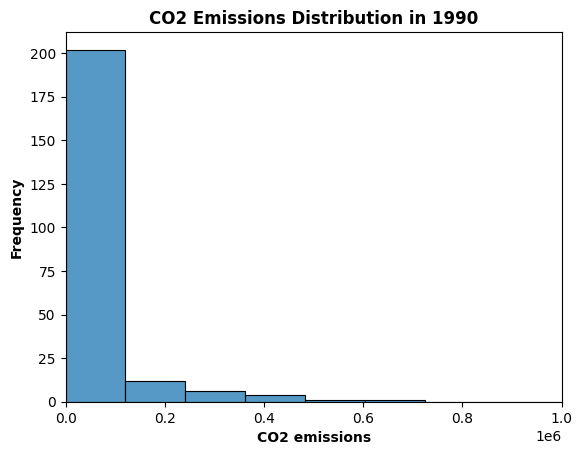

In [23]:
sn.histplot(data=countries_co2_emissions_1990_df['1990'], bins=40)
plt.xlim(0, 1e6)

plt.xlabel("CO2 emissions", weight="bold")
plt.ylabel("Frequency", weight="bold")
plt.title("CO2 Emissions Distribution in 1990", weight="bold")
plt.show()

The distribution as seen in the histogram is as expected based on the previous two questions. The distribution is right skewed and most data values lie in the lower spectrum of CO2 emissions. Few values take extremely high values than the rest of the data values.

&nbsp;

In [24]:
std_co2_emmisions_1990 = countries_co2_emissions_1990_df["1990"].std()
print("The standard deviation of co2 emmissions in 1990 is", round(std_co2_emmisions_1990,2))
stderr_co2_emmisions_1990 = std_co2_emmisions_1990/np.sqrt(len(countries_co2_emissions_1990_df))
print("The standard error of co2 emmissions in 1990 is", round(stderr_co2_emmisions_1990,2))

The standard deviation of co2 emmissions in 1990 is 401628.09
The standard error of co2 emmissions in 1990 is 26482.57


The standard error is smaller in value than the standard deviation. Since the standard error value is very small, it shows that the mean of this dataset sample is closer to the population mean for CO2 emissions.

&nbsp;

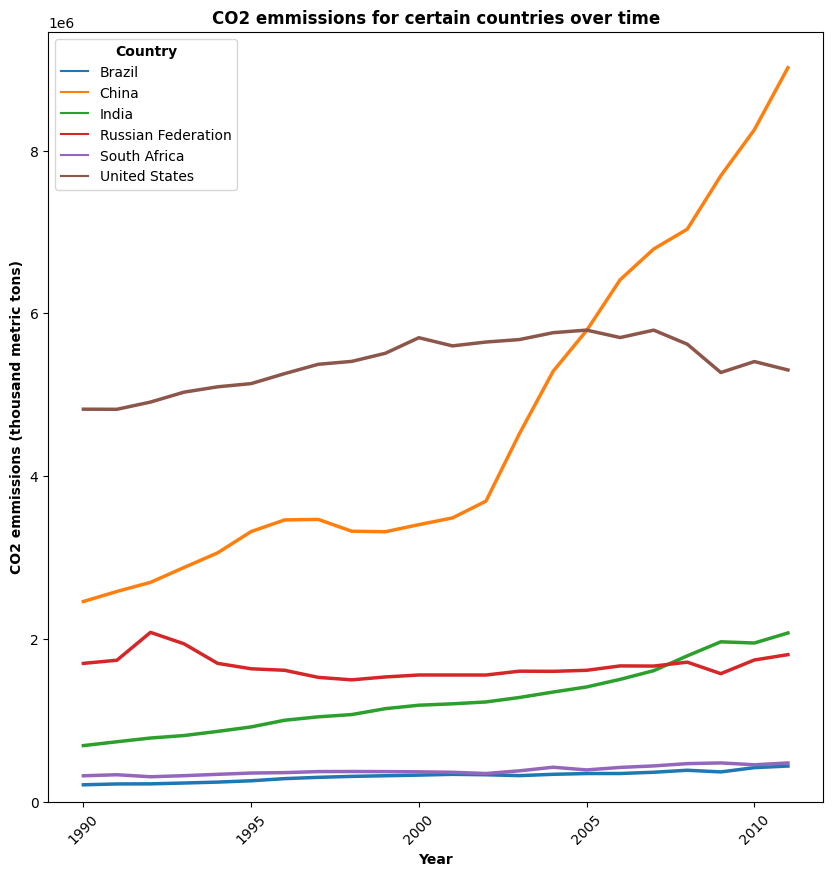

In [25]:
selected_countries = ["Brazil", "Russian Federation", "China", "India", "United States", "South Africa"]
year_columns = [column for column in statistical_df_cleaned.columns if column.isdigit()]

Countries_co2_emissions_df = pd.melt(statistical_df_cleaned, id_vars=['Country', 'Series'], value_vars=year_columns, var_name='Year', value_name='Value')

Countries_co2_emissions_df['Year'] = pd.to_numeric(Countries_co2_emissions_df['Year'], errors='coerce')
Countries_co2_emissions_df['Value'] = pd.to_numeric(Countries_co2_emissions_df['Value'], errors='coerce')

Countries_co2_emissions_df = Countries_co2_emissions_df[Countries_co2_emissions_df["Country"].isin(selected_countries)]
Countries_co2_emissions_df = Countries_co2_emissions_df[Countries_co2_emissions_df["Series"] == "Carbon dioxide emissions (CO2), thousand metric tons of CO2 (CDIAC)"]

Countries_co2_emissions_df['Value'] = Countries_co2_emissions_df.groupby('Year')['Value'].transform(lambda x: x.fillna(x.mean()))

plt.figure(figsize=(10, 10)) 

sn.lineplot(x=Countries_co2_emissions_df["Year"], y=Countries_co2_emissions_df["Value"], hue="Country", data=Countries_co2_emissions_df, linewidth=2.5)
plt.xticks(rotation=45)

plt.title("CO2 emmissions for certain countries over time", weight="bold")
plt.xlabel("Year", weight="bold")
plt.ylabel("CO2 emmissions (thousand metric tons)", weight="bold")

legend = plt.legend(title='Country')
legend.get_title().set_fontweight('bold')

plt.ylim(bottom=0)
plt.show()

The CO2 emissions in China grew exponentially over time, and it has the highest growth than other countries. United States started with the highest CO2 emissions in 1990 than the other countries and the growth rate of these emissions over time grew gradually and was surpassed by China. But it seems to be one of the countries with the highest CO2 emissions. South Africa and Brazil are the countries with the lowest CO2 emissions and their growth almost remained constant over the years. Russian Federation and India had a gradual increase in CO2 emissions over time.

&nbsp;

In [26]:
proportion_covered_by_forest_df = mdg_df[mdg_df["Series"] == 'Proportion of land area covered by forest, percentage']
mean_land_area_covered_forest_1990 = proportion_covered_by_forest_df["1990"].mean()
std_land_area_covered_forest_1990 = proportion_covered_by_forest_df["1990"].std()
print(round(mean_land_area_covered_forest_1990,2))
print(round(std_land_area_covered_forest_1990,2))

33.06
25.24


The standard deviation is high because the percentages of the land covered by forest are very different from the average percentages. Meaning, that the values for the percentage of land covered by forest are dispersed.

&nbsp;

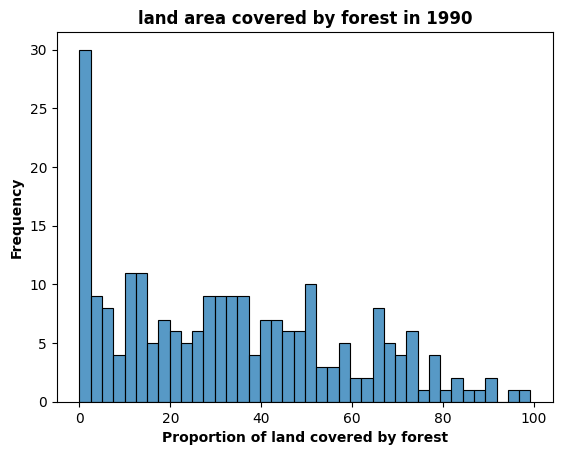

In [27]:
sn.histplot(data=proportion_covered_by_forest_df['1990'], bins=40)
plt.title("land area covered by forest in 1990", weight="bold")
plt.xlabel("Proportion of land covered by forest", weight="bold")
plt.ylabel("Frequency", weight="bold")
plt.show()

The distribution of the proportion of land covered by forest is right skewed because the proportions gravitate towards the lower values. The largest proportion falls between 0 and 20 percent of land covered by forest. It means most land was less covered by forest in 1990.

&nbsp;

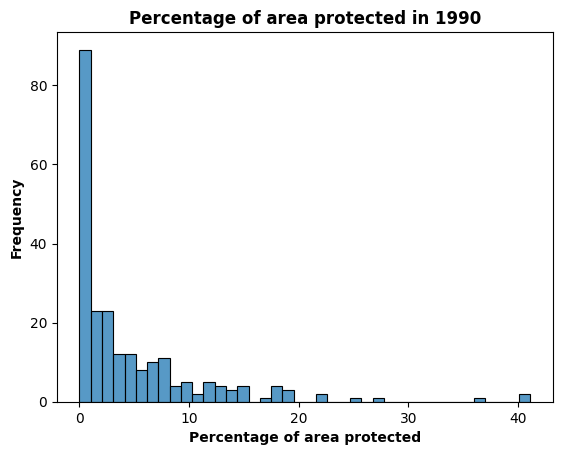

In [28]:
percentage_area_protected_df = mdg_df[mdg_df["Series"] == 'Terrestrial and marine areas protected to total territorial area, percentage']
sn.histplot(data=percentage_area_protected_df['1990'], bins=40)
plt.title("Percentage of area protected in 1990", weight="bold")
plt.xlabel("Percentage of area protected", weight="bold")
plt.ylabel("Frequency", weight="bold")
plt.show()

The distribution of the percentage of area protected is also skewed to the right. This is because the percentage values gravitate towards the lowest values. The highest category is the percentage of area protected between 0 and 10. This means most areas were less protected in 1990.

&nbsp;

Scatter plot showing the relationship between the proportion of land area covered by forest and the percentage of area protected in 2000.

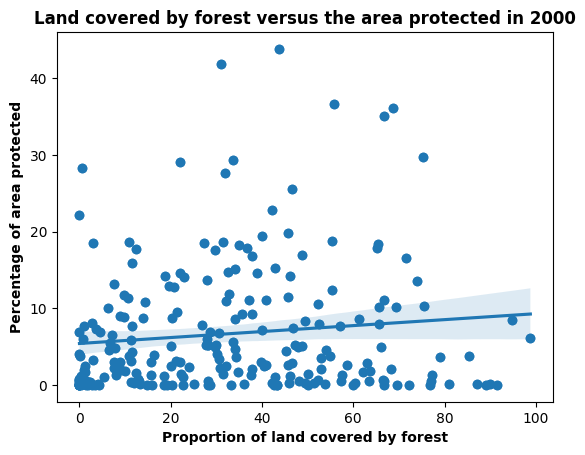

In [29]:
mdg_df["2000"] = pd.to_numeric(mdg_df["2000"], errors="coerce")
x = mdg_df["2000"].loc[mdg_df["Series"] == "Proportion of land area covered by forest, percentage"]
y = mdg_df["2000"].loc[mdg_df["Series"] == "Terrestrial and marine areas protected to total territorial area, percentage"]

plt.scatter(x, y)
sn.regplot(x=x, y=y, data=mdg_df)

plt.title("Land covered by forest versus the area protected in 2000", weight="bold")
plt.xlabel("Proportion of land covered by forest", weight="bold")
plt.ylabel("Percentage of area protected", weight="bold")
plt.show()

There seems to be no relationship between the proportion of land area covered by forest and the percentage of area protected in 2000. The data points are scattered all over the plot with no traceable trend. It is also very difficult to trace the extreme values because there is no noticeable trend in the plot.

&nbsp;

Log transforming the forest land area and protected area variables. Since the x and y values have zeros, before log transforming, a small constant which is 1 in this case has been added to these values. This is to ensure that there are no computational issues since a logarithmic of zero is undefined.

In [30]:
x = x + 1
y = y + 1

mdg_df["log_transformed_forested_land_area_value_2000"] = np.log(x)
mdg_df["log_transformed_protected_area_value_2000"] = np.log(y)

log_transformed_land_area_covered_2000_df = mdg_df[['Country', 'log_transformed_forested_land_area_value_2000']].copy()
log_transformed_protected_area_2000_df = mdg_df[['Country', 'log_transformed_protected_area_value_2000']].copy()

Showing the transformed distributions in histograms.

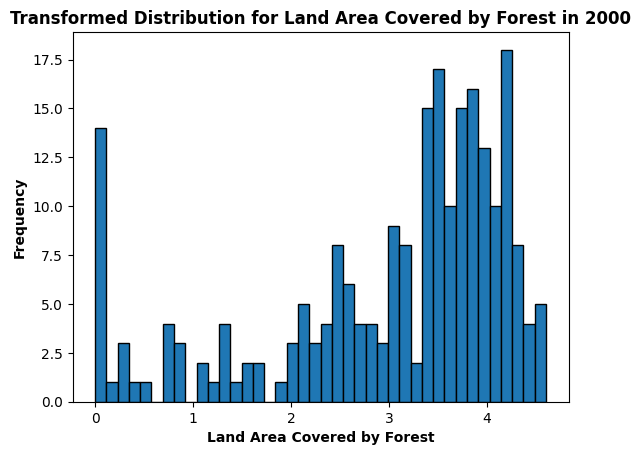

In [31]:
plt.hist(log_transformed_land_area_covered_2000_df["log_transformed_forested_land_area_value_2000"],edgecolor='black', bins=40)
plt.title("Transformed Distribution for Land Area Covered by Forest in 2000", weight="bold")
plt.xlabel("Land Area Covered by Forest", weight="bold")
plt.ylabel("Frequency", weight="bold")
plt.show()


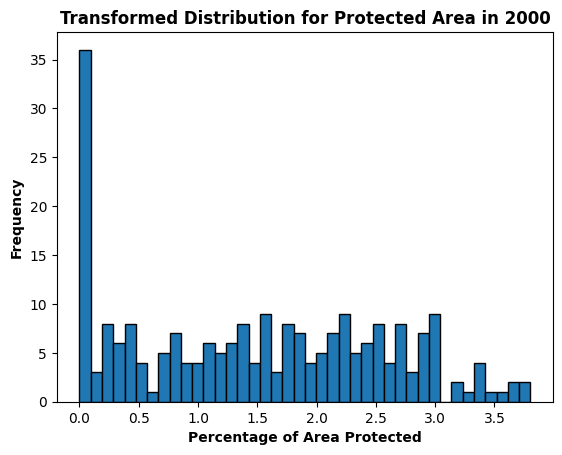

In [32]:
plt.hist(log_transformed_protected_area_2000_df["log_transformed_protected_area_value_2000"],edgecolor='black', bins=40)
plt.title("Transformed Distribution for Protected Area in 2000", weight="bold")
plt.xlabel("Percentage of Area Protected", weight="bold")
plt.ylabel("Frequency", weight="bold")
plt.show()

The histograms after log transforming the variables show a reduction in the skewness of the data. The data follows more of a normal distribution although it is not a perfect one.

&nbsp;

Determining the nature of the relationship between the proportion of land area covered by forest and the percentage of area protected in 1990.

**Null Hypothesis**
There is no linear relationship between the proportion of land area covered by forest and the percentage of area protected.

**Alternative Hypothesis**
There is a linear relationship between the proportion of land area covered by forest and the percentage of area protected.


The variables of land area covered by forest and the area protected in 1990 will be first log-transformed to calculate the correlation coefficients and determine the relationship between these variables.

In [33]:
mdg_df["1990"] = pd.to_numeric(mdg_df["1990"], errors="coerce")
x = mdg_df["1990"].loc[mdg_df["Series"] == "Proportion of land area covered by forest, percentage"]
y = mdg_df["1990"].loc[mdg_df["Series"] == "Terrestrial and marine areas protected to total territorial area, percentage"]

x = x + 1
y = y + 1

mdg_df["log_transformed_forested_land_area_value_1990"] = np.log(x)
mdg_df["log_transformed_protected_area_value_1990"] = np.log(y)

log_transformed_land_area_covered_1990_df = mdg_df[['Country', 'log_transformed_forested_land_area_value_1990']].copy()
log_transformed_protected_area_1990_df = mdg_df[['Country', 'log_transformed_protected_area_value_1990']].copy()


In [34]:
pearson_correlation_coefficient_1990, pearson_p_value_1990 = pearsonr(log_transformed_land_area_covered_1990_df["log_transformed_forested_land_area_value_1990"].dropna(), log_transformed_protected_area_1990_df["log_transformed_protected_area_value_1990"].dropna())
print(f"Pearson Correlation Coefficient (1990): {round(pearson_correlation_coefficient_1990,4)}")
print(f"Pearson p-value (1990): {pearson_p_value_1990:.4f}")

Pearson Correlation Coefficient (1990): 0.1768
Pearson p-value (1990): 0.0072


Since the pearson correlation coefficient is close to 0 and positive, there is a moderate positive linear relationship between the proportion of land area covered by forest and the percentage of area protected. As the pearson p-value is less than the significance value of 0.05, the null hypothesis is rejected. This means that there is a statistically significant linear relationship.

&nbsp;

In [35]:
spearman_correlation_coefficient_1990, spearman_p_value_1990 = spearmanr(log_transformed_land_area_covered_1990_df["log_transformed_forested_land_area_value_1990"].dropna(), log_transformed_protected_area_1990_df["log_transformed_protected_area_value_1990"].dropna())

print(f"Spearman Rank-Order Correlation Coefficient (1990): {round(spearman_correlation_coefficient_1990,4)}")
print(f"Spearman p-value (1990): {spearman_p_value_1990:.4f}")

Spearman Rank-Order Correlation Coefficient (1990): 0.0809
Spearman p-value (1990): 0.2217


Both the coefficient values are similar in magnitude and direction, and the Spearman p-value is greater than the pearson p-value. Since the spearman p value is more than the significance value of 0.05, we fail to reject the null hypothesis. There is no significant evidence to suggest that there is an association between the two variables, land area covered by forest and protected area. Although the pearson p value suggests otherwise, the strength of a liner relationship is very weak according to the pearson correlation.

&nbsp;

# Conclusion

This project focused on analysing the measurements from the three key indicators to improve living conditions over time which were CO2 emissions, the percentage of land area covered by forest and the percentage of area protected. These measurements were recorded for each country. In this analysis several insights emerged, however, the data-cleaning process was fundamental to come up with accurate results. There were several missing values which were filled using predictive fills since this was time series data. Some columns which were not to be used were removed.

After cleaning the data, the analysis focused on CO2 emissions in 1990. The countries that were ranked the highest in terms of CO2 emissions were China and the United States. Some countries that were selected and focused on had gradual increases in CO2 emissions over time. Then the analysis looked at the association between the other two factors which were the percentage of area protected and land area covered by forest. A scatter plot showed that there was no correlation between the two variables since the points were scattered all over the graph.

Since the relationship between the percentage of area protected and land area covered by forest was non-linear, these variables were log-transformed to make them follow a more linear relationship so that the correlation coefficient can be calculated and eventually be able to model this relationship.
